In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from cwgp.cwgp import CWGP
from cwgp.kernel import RBF
import GPy
import numpy as np

In [2]:
CSV_FIlE = "japan.csv"

In [3]:
df = pd.read_csv(CSV_FIlE)

In [4]:
df.columns

Index(['year', 'age', 'female', 'male', 'total'], dtype='object')

In [5]:
df_50 = df[(df["age"]==50)]

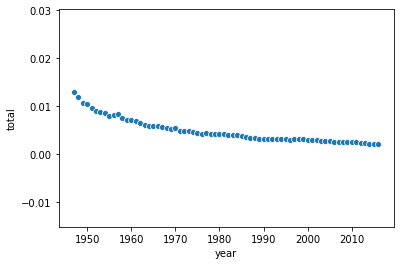

In [6]:
sns.scatterplot(df_50["year"],df_50["total"])

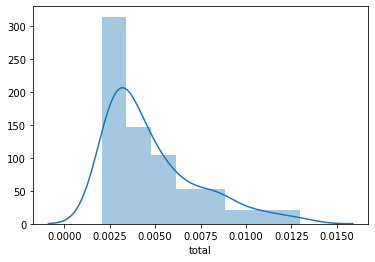

In [7]:
sns.distplot(df_50["total"])

In [8]:
type(df_50["total"].to_numpy())

numpy.ndarray

In [9]:
total = df_50["total"].to_numpy().reshape(-1,1)
year = df_50["year"].to_numpy().reshape(-1,1)

In [10]:
model_c = CWGP("sal",total,transformations=3)
params = model_c.fit()
print(params)

 /home/chen/work/venv/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning:divide by zero encountered in log
 /home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning:invalid value encountered in subtract
 /home/chen/work/venv/lib/python3.6/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning:invalid value encountered in det
 /home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:390: RuntimeWarning:invalid value encountered in less
 /home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:390: RuntimeWarning:invalid value encountered in greater
 /home/chen/work/venv/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:405: RuntimeWarning:invalid value encountered in greater_equal
 /home/chen/work/venv/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning:invalid value encountered in log
 /home/chen/work/venv/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning:ov

      fun: array([-539.7841058])
 hess_inv: <12x12 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.46115032,  0.70314173,  0.07680683, 22.57531834, -1.16851879,
       24.51558884, -0.40211035,  0.6107939 , -0.29235707,  1.49366316,
        0.08878942, -0.17025741])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1872
      nit: 77
     njev: 144
   status: 0
  success: True
        x: array([-2.05134353,  6.40284101,  7.3199261 ,  0.17648723, -0.40720123,
       -0.02545823,  6.87534128,  0.87677785,  0.92067048, -1.3463652 ,
        3.97999486,  0.052268  ])


 /home/chen/work/venv/lib/python3.6/site-packages/cwgp/phi.py:61: RuntimeWarning:overflow encountered in matmul


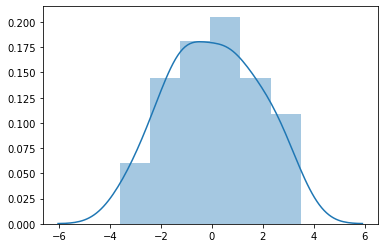

In [11]:
transformed_betas, d = model_c.phi.comp_phi(params.x)
sns.distplot(transformed_betas)


Name : GP regression
Objective : -324.0452785133826
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |  5.5318732446530776e-05  |      +ve      |        
  rbf.lengthscale          |       8.852640694398806  |      +ve      |        
  Gaussian_noise.variance  |  1.4735858887606363e-08  |      +ve      |        
(21, 1) (21, 1)


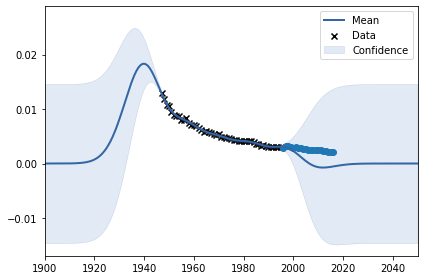

In [12]:
kernel = GPy.kern.RBF(1)

per = 0.7
length = len(year)
X_train, y_train = year.reshape(-1,1)[:int(0.7*len(year))], total[:int(0.7*len(year))]
X_test, y_test = year[np.newaxis].reshape(-1,1)[int(0.7*len(year)):], total.reshape(-1,1)[int(0.7*len(year)):] 
model = GPy.models.GPRegression(X_train, y_train,kernel = kernel)

model.optimize()
model.plot(plot_limits = [1900,2050])
print(model)

print(X_test.shape,y_test.shape)
plt.scatter(X_test,y_test)
plt.show()


Name : GP regression
Objective : -22.88157552648353
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |    2.5108625714606867  |      +ve      |        
  rbf.lengthscale          |     7.436791748326822  |      +ve      |        
  Gaussian_noise.variance  |  0.006698765838170137  |      +ve      |        
(21, 1) (21, 1)


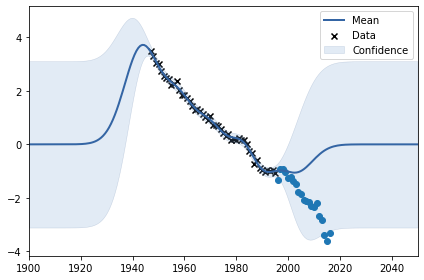

In [13]:
kernel = GPy.kern.RBF(1)

per = 0.7
length = len(year)
X_train, y_train = year.reshape(-1,1)[:int(0.7*len(year))], transformed_betas[:int(0.7*len(year))]
X_test, y_test = year[np.newaxis].reshape(-1,1)[int(0.7*len(year)):], transformed_betas.reshape(-1,1)[int(0.7*len(year)):] 
model = GPy.models.GPRegression(X_train, y_train,kernel = kernel)

model.optimize()
model.plot(plot_limits = [1900,2050])
print(model)

print(X_test.shape,y_test.shape)
plt.scatter(X_test,y_test)
plt.show()